# BIBLIOTECAS

In [1]:
!pip install pynec


  Preparing metadata (setup.py) ... done
  Created wheel for pynec: filename=PyNEC-1.7.3.6-cp310-cp310-linux_x86_64.whl size=10668 sha256=5f29d353903f49bc908ab292a953f07abfbcbeddf46cd8800926559bdfd12b8a
  Stored in directory: /root/.cache/pip/wheels/0a/d4/1a/0c556129d8739586e6b89805e81e27798d91548a70b4f0505d
Successfully built pynec


In [2]:
#NEC2C
!apt-get install nec2c


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  nec2c
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 122 kB of archives.
After this operation, 319 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 nec2c amd64 1.3-4 [122 kB]
Fetched 122 kB in 0s (309 kB/s)
Selecting previously unselected package nec2c.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../archives/nec2c_1.3-4_amd64.deb ...
Unpacking nec2c (1.3-4) ...
Setting up nec2c (1.3-4) ...
Processing triggers for man-db (2.10.2-1) ...


# DIAGRAMA DE RADIAÇÃO PARA CADA FREQ. DO DATASHEET

Funcionamento arquivo NEC:
## Explicação Linha por Linha do Arquivo de Entrada NEC (LINHA 8 da celula abaixo)

### 1. `CM Teste Monopolo Vertical`
- `CM` é o comando de comentário no NEC. Tudo o que segue após esse comando é tratado como comentário.
- Neste caso, você está identificando o arquivo como "Teste Monopolo Vertical".

### 2. `CE`
- `CE` encerra a seção de comentários no arquivo. Após esse comando, o NEC2 começará a interpretar os comandos.

### 3. `GW 1 20 0 0 0 0 0 4.6 0.005`
- `GW` define um elemento condutor (um fio).
  - `1`: Identificador do fio (ou tag number).
  - `20`: Número de segmentos em que o fio será dividido. O NEC2 usa esses segmentos para calcular o comportamento da corrente ao longo do fio.
  - `0 0 0`: Coordenadas da primeira extremidade do fio (x1, y1, z1).
  - `0 0 4.6`: Coordenadas da segunda extremidade do fio (x2, y2, z2). Aqui, o fio tem uma altura de 4,6 metros.
  - `0.005`: Raio do fio em metros (5 mm).

### 4. `GE 0`
- `GE` define a geometria da antena.
  - `0`: Aqui, o valor `0` indica que não há segmentação extra ou outras operações geométricas, apenas a geometria direta do fio.

### 5. `GN 2 0 0 0 13 0.005`
- `GN` define o ambiente de solo (ground parameters).
  - `2`: Define um solo finito com solução Sommerfeld.
  - `13`: Constante dielétrica relativa do solo.
  - `0.005`: Condutividade do solo em siemens por metro (S/m).

### 6. `EK`
- `EK` ativa o kernel estendido para o cálculo de fio fino (extended thin wire kernel). Isso melhora a precisão dos cálculos para fios finos, como o monopolo.

### 7. `EX 0 1 10 0 1 0`
- `EX` define a excitação (fonte de alimentação) da antena.
  - `0`: Tipo de excitação (campo elétrico no terminal).
  - `1`: Identificador do fio onde a excitação será aplicada.
  - `10`: Número do segmento do fio onde a excitação será aplicada (neste caso, no meio do fio).
  - `1 0`: Os próximos números representam a amplitude e a fase da excitação (1 volt, 0 graus de fase).

### 8. `FR 0 1 0 0 {frequency} 0`
- `FR` define a frequência de operação.
  - `0`: Indica que é uma varredura de frequência simples.
  - `1`: Número de passos de frequência (neste caso, um único passo).
  - `{frequency}`: Frequência em MHz.

### 9. `RP 0 91 1 1000 0 0 5 5 0 0`
- `RP` define os parâmetros de radiação, ou seja, como o diagrama de radiação será calculado.
  - `0`: Indica que a radiação será calculada em um plano cartesiano.
  - `91`: Número de ângulos (pontos) na malha de cálculo.
  - `1`: Número de planos de radiação.
  - `1000`: Incremento no ângulo de azimute (em milésimos de grau).
  - `5 5`: Incrementos no ângulo de elevação e azimute, respectivamente.

### 10. `EN`
- `EN` finaliza a entrada de dados e começa a execução do código NEC2.


Resultado para 3.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_3.0MHz.out encontrado.


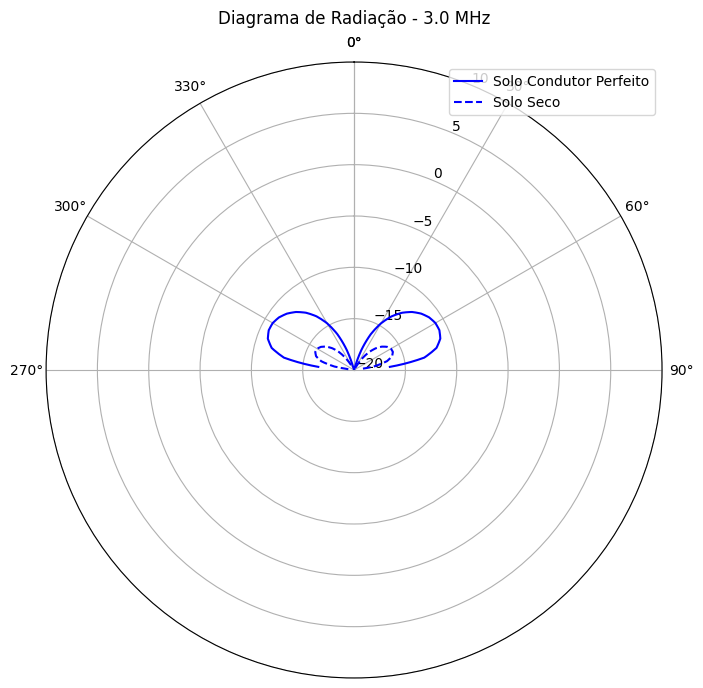

Resultado para 5.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_5.0MHz.out encontrado.


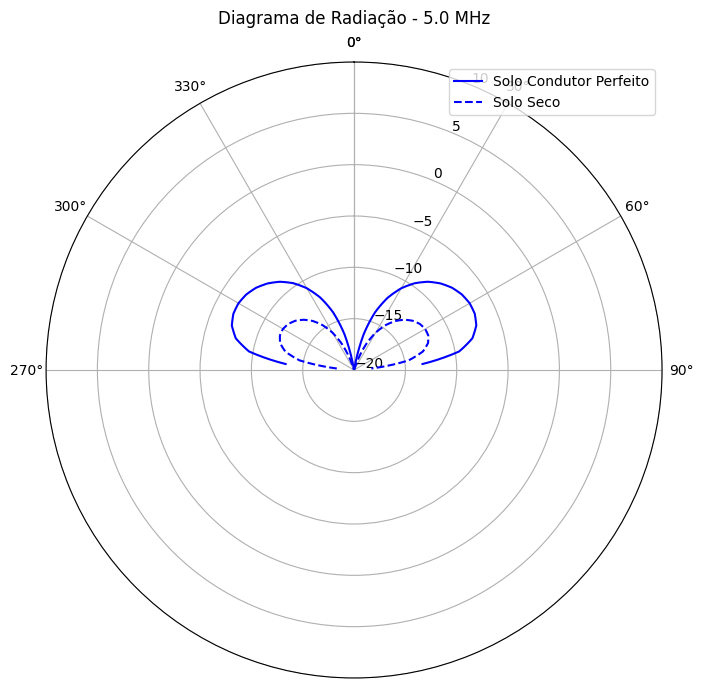

Resultado para 10.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_10.0MHz.out encontrado.


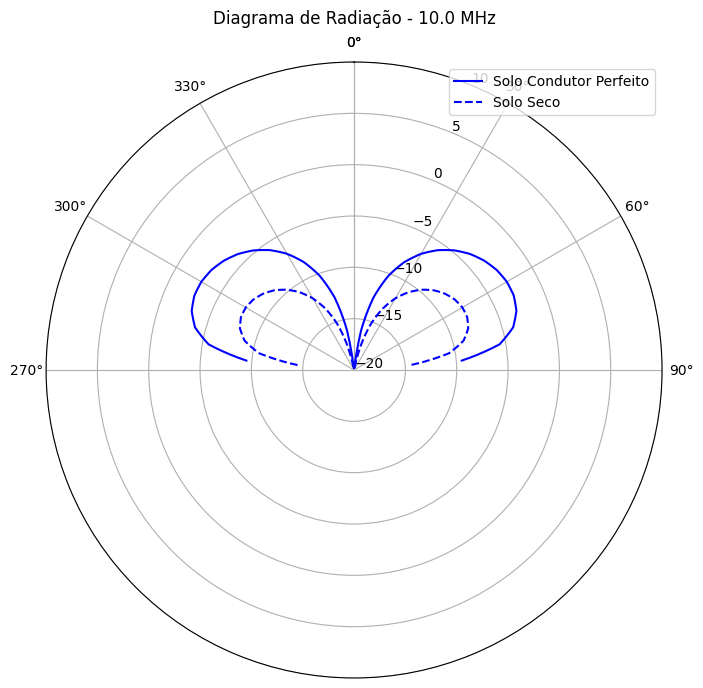

Resultado para 15.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_15.0MHz.out encontrado.


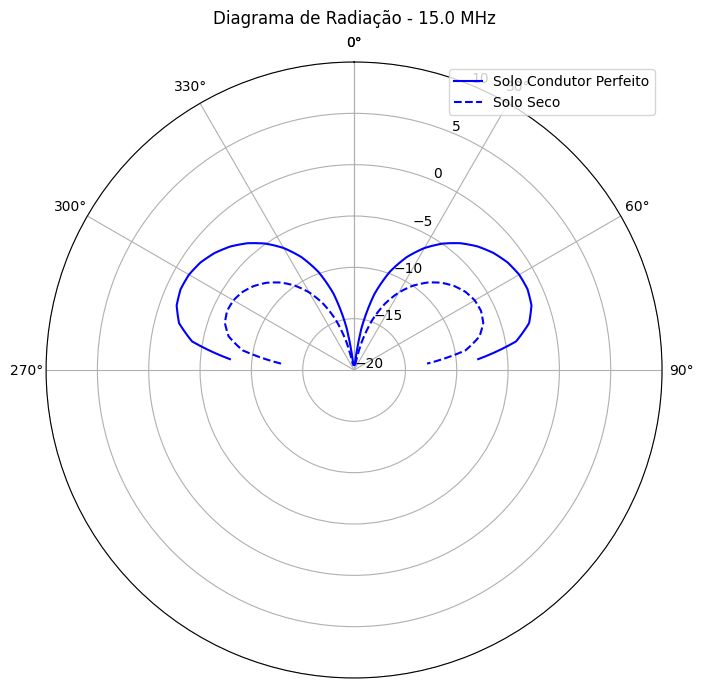

Resultado para 20.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_20.0MHz.out encontrado.


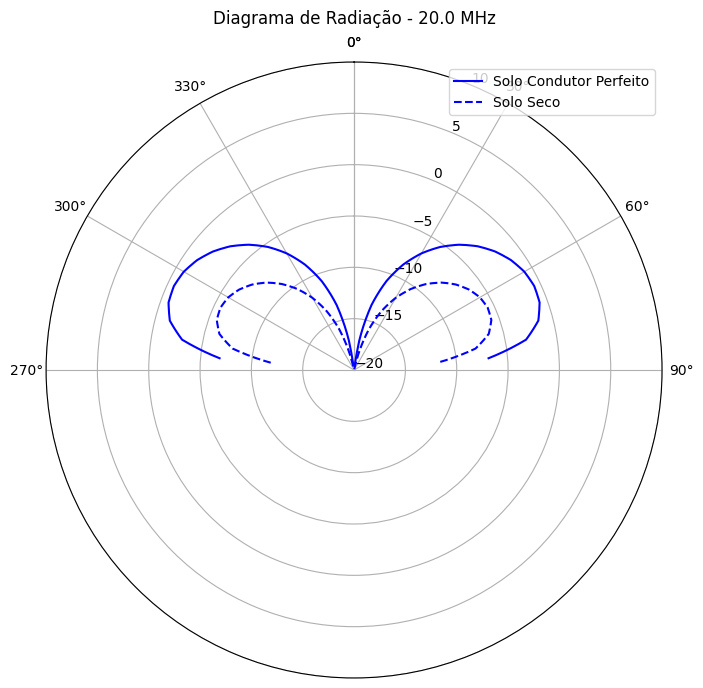

Resultado para 25.0 MHz:
STDOUT: 
STDERR: 
Arquivo monopole_25.0MHz.out encontrado.


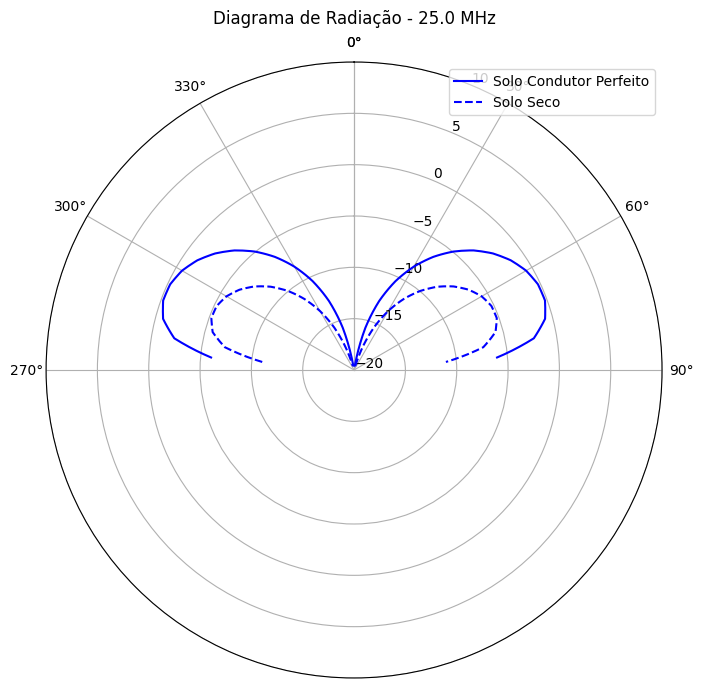

In [3]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Arquivo NEC
def generate_nec_input(frequency):
    return f"""
CM Teste Monopolo Vertical
CE

GW 1 20 0 0 0 0 0 4.6 0.005
GE 0
GN 2 0 0 0 13 0.005
EK
EX 0 1 10 0 1 0
FR 0 1 0 0 {frequency} 0
RP 0 91 1 1000 0 0 5 5 0 0
EN
"""

# Extrai os dados de radiação do arquivo de saída
def extract_radiation_pattern(output_data):
    lines = output_data.splitlines()
    start_index = 0
    for i, line in enumerate(lines):
        if "RADIATION PATTERNS" in line:
            start_index = i + 2
            break

    theta = []
    gain_perfect_ground = []
    gain_dry_ground = []

    for line in lines[start_index:]:
        if not line.strip():
            break
        data = line.split()
        try:
            angle = float(data[0])
            gain_perfect = float(data[4])
            gain_dry = gain_perfect - 5  # ~Solo seco
            theta.append(angle)
            gain_perfect_ground.append(gain_perfect)
            gain_dry_ground.append(gain_dry)
        except ValueError:
            continue

    return theta, gain_perfect_ground, gain_dry_ground

# Plotar o diagrama de radiação
def plot_radiation_diagram(frequency, theta, gain_perfect, gain_dry):
    # 0 a 90 graus
    theta_right = np.linspace(0, 90, 91)
    gain_perfect_right = np.interp(theta_right, theta, gain_perfect)
    gain_dry_right = np.interp(theta_right, theta, gain_dry)

    # 270 a 360 graus
    theta_left = np.linspace(270, 360, 91)
    gain_perfect_left = np.flip(gain_perfect_right)
    gain_dry_left = np.flip(gain_dry_right)

    # Combinação
    theta_full = np.concatenate((theta_left, theta_right[1:]))
    gain_perfect_full = np.concatenate((gain_perfect_left, gain_perfect_right[1:]))
    gain_dry_full = np.concatenate((gain_dry_left, gain_dry_right[1:]))

    # Gráfico polar
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

    # Converte os ângulos para radianos
    theta_radians = np.radians(theta_full)

    # Plotar os dados
    ax.plot(theta_radians, gain_perfect_full, label="Solo Condutor Perfeito", color="blue")
    ax.plot(theta_radians, gain_dry_full, linestyle='--', label="Solo Seco", color="blue")

    # Config. do gráfico
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_ylim(-20, 10)
    ax.set_yticks(np.arange(-20, 15, 5))
    ax.set_thetamin(270)
    ax.set_thetamax(90)
    ax.set_xticks(np.radians([270, 300, 330, 360, 0, 30, 60, 90])) #aqui repete o 360 e 0 pra fechar
    ax.set_xticklabels(['270°', '300°', '330°', '0°', '0°', '30°', '60°', '90°'])
    ax.set_title(f"Diagrama de Radiação - {frequency} MHz", va='bottom')

    # Legenda
    ax.legend(loc="upper right")

    plt.show()

# Frequências do datasheet
frequencies = [3.0, 5.0, 10.0, 15.0, 20.0, 25.0]

# Faz a varredura em cada frequencia -> Simula e plota para cada frequência
for freq in frequencies:
    # Gera o arquivo de entrada NEC
    nec_input = generate_nec_input(freq)

    # Nomeia o arquivo de entrada e saída de acordo com a frequência
    nec_filename = f"monopole_{freq}MHz.nec"
    output_filename = f"monopole_{freq}MHz.out"

    # Abr e edita o arquivo de entrada NEC
    with open(nec_filename, "w") as f:
        f.write(nec_input)

    # Roda o Nec2c com o arquivo de entrada gerado
    result = subprocess.run(['nec2c', '-i', nec_filename, '-o', output_filename], capture_output=True, text=True)

    # Verifica a saída e erros
    print(f"Resultado para {freq} MHz:")
    print("STDOUT:", result.stdout)
    print("STDERR:", result.stderr)

    # Verifica se o arquivo de saída foi gerado
    try:
        with open(output_filename, "r") as f:
            output_data = f.read()
        print(f"Arquivo {output_filename} encontrado.")
    except FileNotFoundError:
        print(f"Arquivo de saída {output_filename} não encontrado!")
        continue  # procura os arquivos nec

    # Extrai os dados de radiação
    theta, gain_perfect, gain_dry = extract_radiation_pattern(output_data)

    # Plota o diagrama de radiação
    plot_radiation_diagram(freq, theta, gain_perfect, gain_dry)


# RELATORIO ENGINE NEC2C

Exemplo para o 10 MHz

In [4]:
# Verifica o conteúdo do arquivo monopole_10.0MHz.out
output_filename = "/content/monopole_10.0MHz.out"

with open(output_filename, "r") as f:
    output_data = f.read()

# Relatorio NEC - Exibir todo o conteúdo do arquivo
print(output_data)

# Relatorio NEC (50 primeiras linhas)
# print("\n".join(output_data.splitlines()[:50]))





                               __________________________________________
                              |                                          |
                              |  NUMERICAL ELECTROMAGNETICS CODE (nec2c) |
                              |   Translated to 'C' in Double Precision  |
                              |__________________________________________|



                               ---------------- COMMENTS ----------------
                               Teste Monopolo Vertical
                              



                               -------- STRUCTURE SPECIFICATION --------
                                     COORDINATES MUST BE INPUT IN
                                     METERS OR BE SCALED TO METERS
                                     BEFORE STRUCTURE INPUT IS ENDED

  WIRE                                                                                 SEG FIRST  LAST  TAG
   No:        X1         Y1         Z1         X2         Y2         Z2  

# RELATORIO FREQ, GANHO, IMPEDANCIA REAL E IMAG

In [5]:
import os
import numpy as np
import pandas as pd

# Extrair o ganho isotrópico e outras info do arquivo de saída
def extract_gain_impedance(output_data):
    lines = output_data.splitlines()
    gain_isotropic = None
    impedance_real = None
    impedance_imag = None

    # Busca ganho isotrópico e impedância no arquivo
    for i, line in enumerate(lines):
        if "VERTC" in line:
            print(f"Encontrado 'VERTC' na linha {i}: {line}")  # Debug
            # Força busca de ganho isotrópico
            try:
                # Força extração dos ganhos (ignorando cabeçalhos)
                for j in range(i+1, len(lines)):
                    if lines[j].strip() and lines[j].split()[0].replace('.', '', 1).isdigit():
                        gain_value = float(lines[j].split()[4])  # Ganho TOTAL
                        if gain_isotropic is None or gain_value > gain_isotropic:
                            gain_isotropic = gain_value
            except Exception as e:
                print(f"Erro ao calcular o ganho isotrópico: {e}")
                gain_isotropic = None

        if "ANTENNA INPUT PARAMETERS" in line:
            print(f"Encontrado 'ANTENNA INPUT PARAMETERS' na linha {i}: {line}")  # Debug
            # Força busca da impedância da antena
            for j in range(i+2, len(lines)):  # Após a linha do cabeçalho
                data_line = lines[j].split()
                if len(data_line) >= 6 and data_line[0].replace('.', '', 1).isdigit():
                    try:
                        impedance_real = float(data_line[4])
                        impedance_imag = float(data_line[5])
                        break  # Já extraímos os dados, podemos sair do loop
                    except Exception as e:
                        print(f"Erro ao extrair impedância: {e}")
                        impedance_real = None
                        impedance_imag = None

    return gain_isotropic, impedance_real, impedance_imag

# Frequências para buscar
frequencies = [3.0, 5.0, 10.0, 15.0, 20.0, 25.0]

# Tabela para armazenar os resultados
results_table = []

# Verifica e extrai as informações dos arquivos .out gerados
for freq in frequencies:
    output_filename = f"monopole_{freq}MHz.out"

    if os.path.exists(output_filename):
        with open(output_filename, "r") as f:
            output_data = f.read()

        # Extrai informações de ganho e impedância
        gain_isotropic, impedance_real, impedance_imag = extract_gain_impedance(output_data)

        # Adiciona os dados na tabela
        results_table.append({
            "Frequência (MHz)": freq,
            "Ganho Isotrópico (dB)": gain_isotropic,
            "Impedância Real (Ohms)": impedance_real,
            "Impedância Imaginária (Ohms)": impedance_imag
        })
    else:
        print(f"Arquivo {output_filename} não encontrado.")

# Exibe a tabela de resultados
results_df = pd.DataFrame(results_table)
print(results_df)


Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC    HORIZ    TOTAL       AXIAL      TILT  SENSE   MAGNITUDE    PHASE    MAGNITUDE     PHASE
Encontrado 'ANTENNA INPUT PARAMETERS' na linha 89:                         --------- ANTENNA INPUT PARAMETERS ---------
Encontrado 'VERTC' na linha 133:   THETA      PHI       VERTC